British Airway Review Sentiment Analysis using BERT and Vader

In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 
import nltk

In [3]:
#create an empty list to collect all reviews
reviews  = []

#create an empty list to collect rating stars
stars = []

#create an empty list to collect date
date = []

#create an empty list to collect country the reviewer is from
country = []

In [4]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 29
Error on page 31
Error on page 31
Error on page 33
Error on page 33
Error on page 34


In [5]:
#check the length of total reviews extracted
len(reviews)

3460

In [6]:
len(country)

3460

In [7]:
#check the length
stars = stars[1:3461]
len(stars)

3460

In [8]:
len(date)

3460

In [50]:
#create a data frame from these collected lists of data

df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [51]:
df

,reviews,stars,date,country
0,Not Verified | It seems that there is a race t...,3,19th January 2023,United States
1,Not Verified | As a Spanish born individual l...,2,19th January 2023,United Kingdom
2,✅ Trip Verified | A rather empty and quiet fl...,9,18th January 2023,United Kingdom
3,✅ Trip Verified | Easy check in and staff mem...,9,17th January 2023,United Kingdom
4,✅ Trip Verified | Being a silver flyer and bo...,1,17th January 2023,United Kingdom
...,...,...,...,...
3455,Flew LHR - VIE return operated by bmi but BA a...,1,29th August 2012,United Kingdom
3456,LHR to HAM. Purser addresses all club passenge...,8,28th August 2012,United Kingdom
3457,My son who had worked for British Airways urge...,10,12th October 2011,United Kingdom
3458,London City-New York JFK via Shannon on A318 b...,8,11th October 2011,United States


In [55]:
df['verified'] = df['reviews'].str.contains("Trip Verified")

In [12]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Cleaning the Reviews column

In [56]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
lemma = WordNetLemmatizer()

reviews_data = df.reviews.str.strip("✅ Trip Verified |")

corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ',rev)
    rev = rev.lower()
    rev=rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev=" ".join(rev)
    corpus.append(rev)

df['corpus'] = corpus


In [57]:
#converting date into datetime format
df.date = pd.to_datetime(df.date)

Cleaning tha stars

In [58]:
df.stars.unique()

array(['3', '2', '9', '1', '4', '5', '8', '6', '7', '10',
       '\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', 'None'], dtype=object)

In [59]:
df.stars = df.stars.str.strip('\n\t\t\t\t\t\t\t\t\t\t\t\t\t')
df.drop(df[df.stars=='None'].index,axis=0,inplace=True)

In [60]:
df.stars.unique()

array(['3', '2', '9', '1', '4', '5', '8', '6', '7', '10'], dtype=object)

Checking for Null Values

In [61]:
df[df.isnull()].sum()

C:\Users\user\AppData\Local\Temp\ipykernel_6744\3815804470.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



reviews     0
stars       0
country     0
verified    0
corpus      0
dtype: object

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3454 entries, 0 to 3459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviews   3454 non-null   object        
 1   stars     3454 non-null   object        
 2   date      3454 non-null   datetime64[ns]
 3   country   3454 non-null   object        
 4   verified  3454 non-null   bool          
 5   corpus    3454 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 165.3+ KB


In [62]:
df.drop(df[df['country']==True].index,axis=0,inplace=True)

In [21]:
df.shape

(3454, 6)

In [63]:
#resetting the index
df.reset_index(drop=True)

,reviews,stars,date,country,verified,corpus
0,Not Verified | It seems that there is a race t...,3,2023-01-19,United States,False,verified seems race bottom amongst airline can...
1,Not Verified | As a Spanish born individual l...,2,2023-01-19,United Kingdom,False,verified spanish born individual living englan...
2,✅ Trip Verified | A rather empty and quiet fl...,9,2023-01-18,United Kingdom,True,rather empty quiet flight tel aviv friendly ca...
3,✅ Trip Verified | Easy check in and staff mem...,9,2023-01-17,United Kingdom,True,easy check staff member polite helpful made sp...
4,✅ Trip Verified | Being a silver flyer and bo...,1,2023-01-17,United Kingdom,True,silver flyer booking flight ba dublin would th...
...,...,...,...,...,...,...
3449,Flew LHR - VIE return operated by bmi but BA a...,1,2012-08-29,United Kingdom,False,flew lhr vie return operated bmi ba aircraft a...
3450,LHR to HAM. Purser addresses all club passenge...,8,2012-08-28,United Kingdom,False,lhr ham purser address club passenger name boa...
3451,My son who had worked for British Airways urge...,10,2011-10-12,United Kingdom,False,son worked british airway urged fly british ai...
3452,London City-New York JFK via Shannon on A318 b...,8,2011-10-11,United States,False,london city new york jfk via shannon really ni...


Expolatory Data Analysis

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Text(0, 0.5, 'Count of Rating')

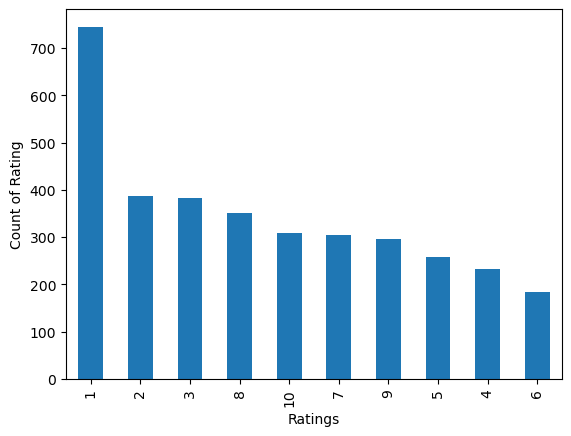

In [24]:
df.stars.value_counts().plot(kind='bar')
plt.xlabel('Ratings')
plt.ylabel('Count of Rating')


In [25]:
df_ratings = pd.DataFrame(df.stars.value_counts())
pct_values = (df_ratings.stars.values/ df_ratings.stars.values.sum() *100).tolist()
pct_values = [round(x,2) for x in pct_values]
df_ratings['pct_values'] = pct_values

In [26]:
df_ratings.reset_index(inplace=True)

In [27]:
# renaming columns
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [28]:
df_ratings

,Stars,total_counts,pct_values
0,1,745,21.57
1,2,387,11.20
2,3,383,11.09
3,8,352,10.19
4,10,310,8.98
5,7,304,8.80
6,9,297,8.60
7,5,259,7.50
8,4,232,6.72
9,6,185,5.36


Text(0.5, 1.0, 'Count of Ratings')

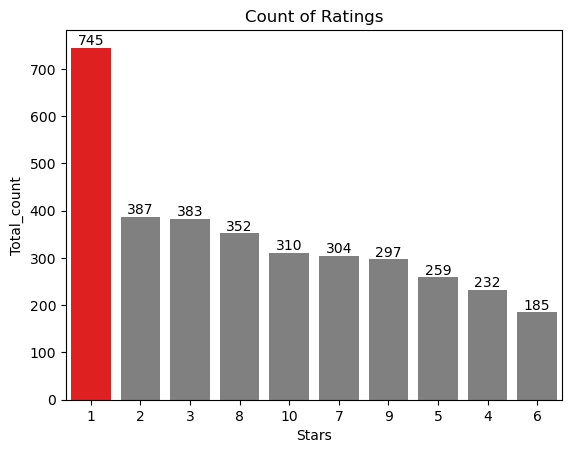

In [29]:
clrs = ['Red' if (x ==max(df_ratings.total_counts)) else 'Grey' for x in df_ratings.total_counts]
ax=sns.barplot(data=df_ratings,x=df_ratings.Stars,y=df_ratings.total_counts,palette=clrs)
ax.bar_label(ax.containers[0])
ax.set_xlabel('Stars')
ax.set_ylabel('Total_count')
ax.set_title('Count of Ratings')

Which country most review comes from?

In [30]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

70 unique countries


In [31]:
df_country_review  =pd.DataFrame(df.country.value_counts().head()).reset_index()

In [32]:
df_country_review.rename(columns={'index':'country','country': 'revcount'},inplace=True)

Text(0.5, 1.0, 'Maximum number of review by country')

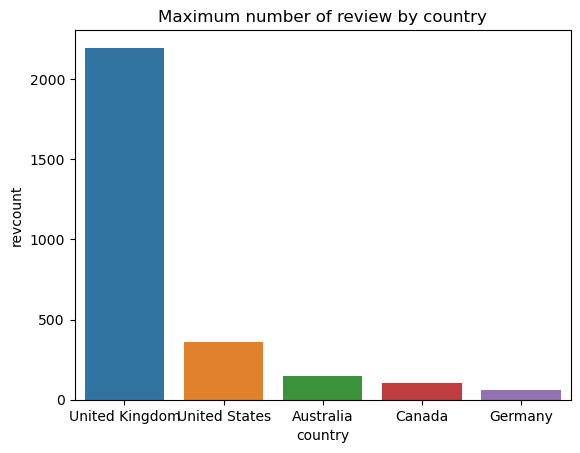

In [33]:
sns.barplot(data=df_country_review,x='country',y='revcount')
plt.title("Maximum number of review by country")


Time Series Analysis

In [53]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

As we can their is continous fluctuation in the data. So we cannot say much about flight in data

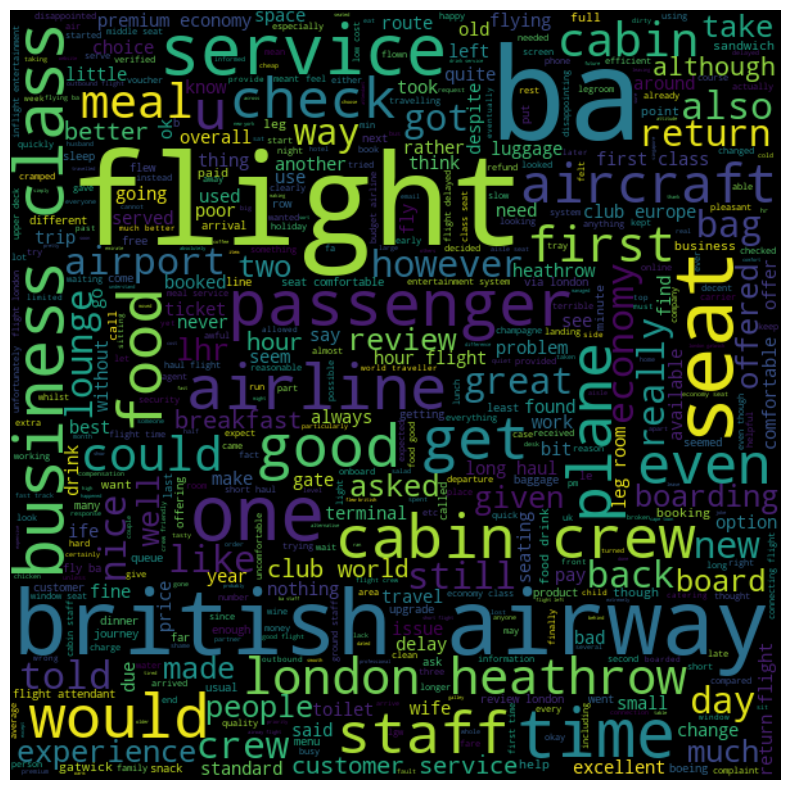

In [70]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(height=600,width = 600,max_words=500,max_font_size=100,stopwords=stopwords).generate(reviews)
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis("off")
plt.show()

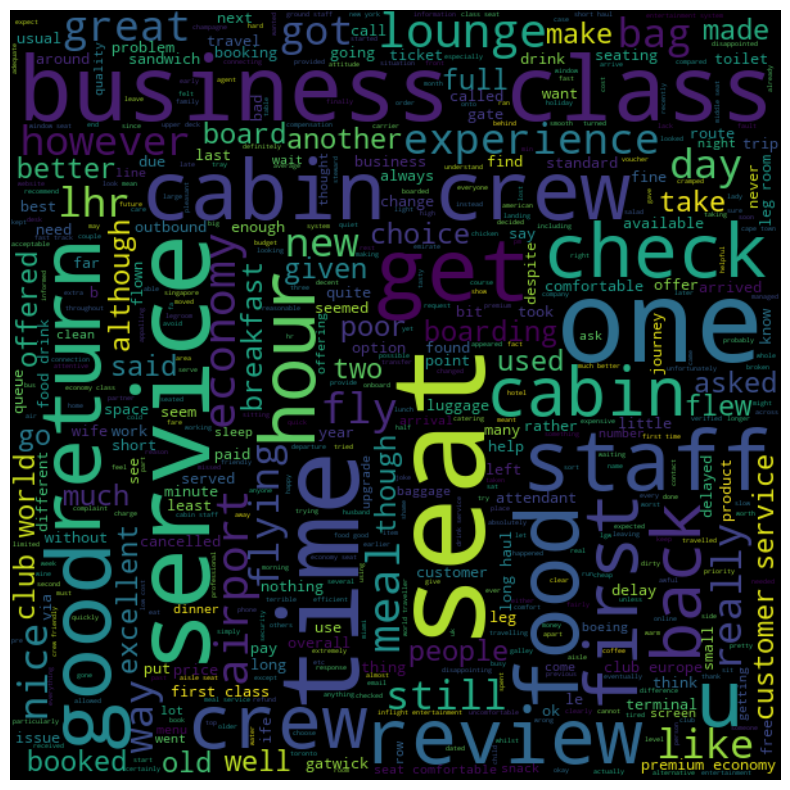

In [74]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" ,"london", "heathrow", "aircraft", "could","even", "would"])

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width = 600,max_words=500,max_font_size=100,stopwords=stopwords).generate(reviews)

#Display this generated image
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

As we can see Seat , service time , Food , cabin crew has been most of the time used . Though we dont know whether it is posted in a good or bad context

WordFrequency

In [77]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

words = reviews.split(" ")

stopwords= text.ENGLISH_STOP_WORDS.union(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" ,"london", "heathrow", "aircraft", "could","even", "would"])

new_words=[word for word in words if word not in stopwords]
nlp_words = FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

In [78]:
all_fdist

seat        4279
service     2784
food        2274
time        2272
crew        2112
good        2003
cabin       1981
class       1818
hour        1710
business    1490
staff       1479
economy     1356
check       1215
drink       1170
meal        1118
lounge      1065
return      1065
club        1048
lhr         1030
u            995
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'seat'),
  Text(1, 0, 'service'),
  Text(2, 0, 'food'),
  Text(3, 0, 'time'),
  Text(4, 0, 'crew'),
  Text(5, 0, 'good'),
  Text(6, 0, 'cabin'),
  Text(7, 0, 'class'),
  Text(8, 0, 'hour'),
  Text(9, 0, 'business'),
  Text(10, 0, 'staff'),
  Text(11, 0, 'economy'),
  Text(12, 0, 'check'),
  Text(13, 0, 'drink'),
  Text(14, 0, 'meal'),
  Text(15, 0, 'lounge'),
  Text(16, 0, 'return'),
  Text(17, 0, 'club'),
  Text(18, 0, 'lhr'),
  Text(19, 0, 'u')])

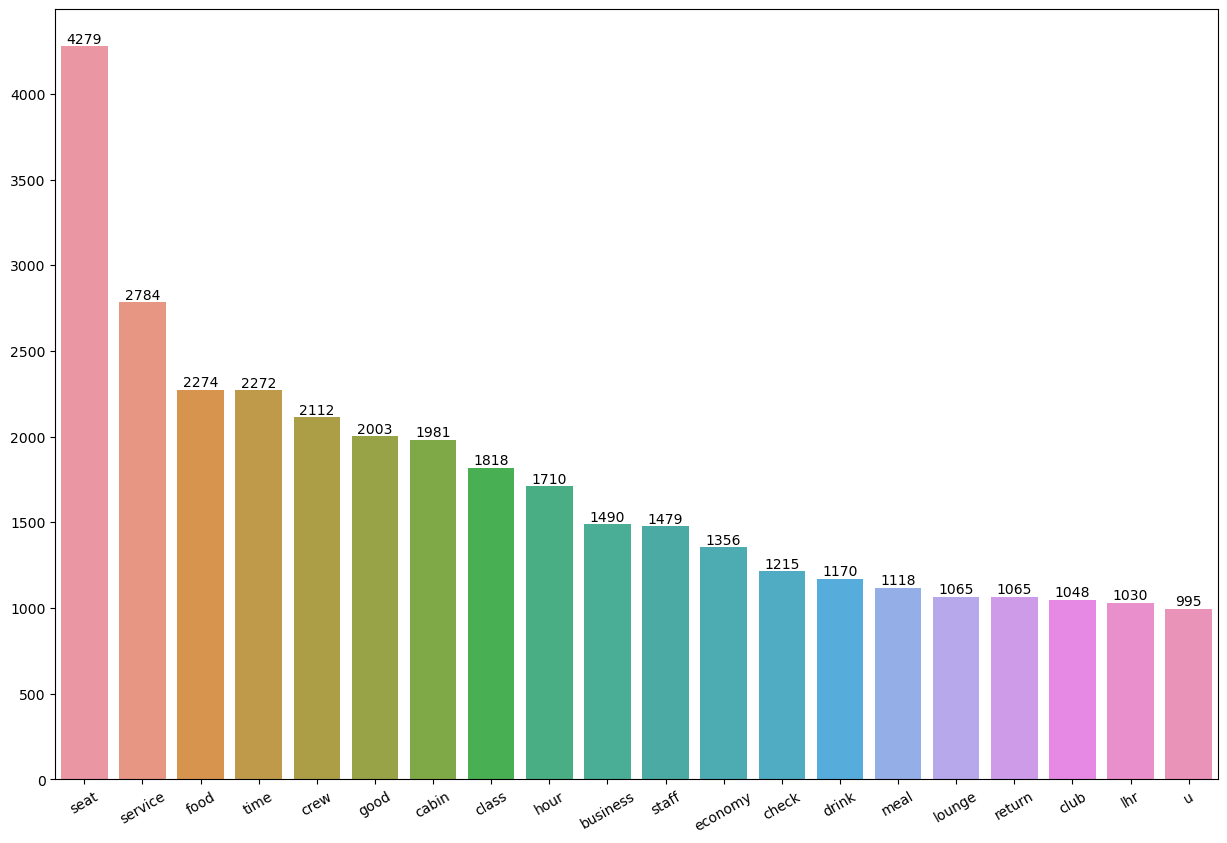

In [80]:
## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
plt.figure(figsize=(15,10))
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

This gives us a glimpse of what customers are really talking about here. We see that Seat is most talked about the airline followed by "Service" and "food" which are all very important to customers in terms of service. However, we still do not know is how they are expressing about each of this service. To bring some significane to these terms we will use ngram plots to see if they are bad or good in experience

Word Frequency using n-grams

<AxesSubplot:>

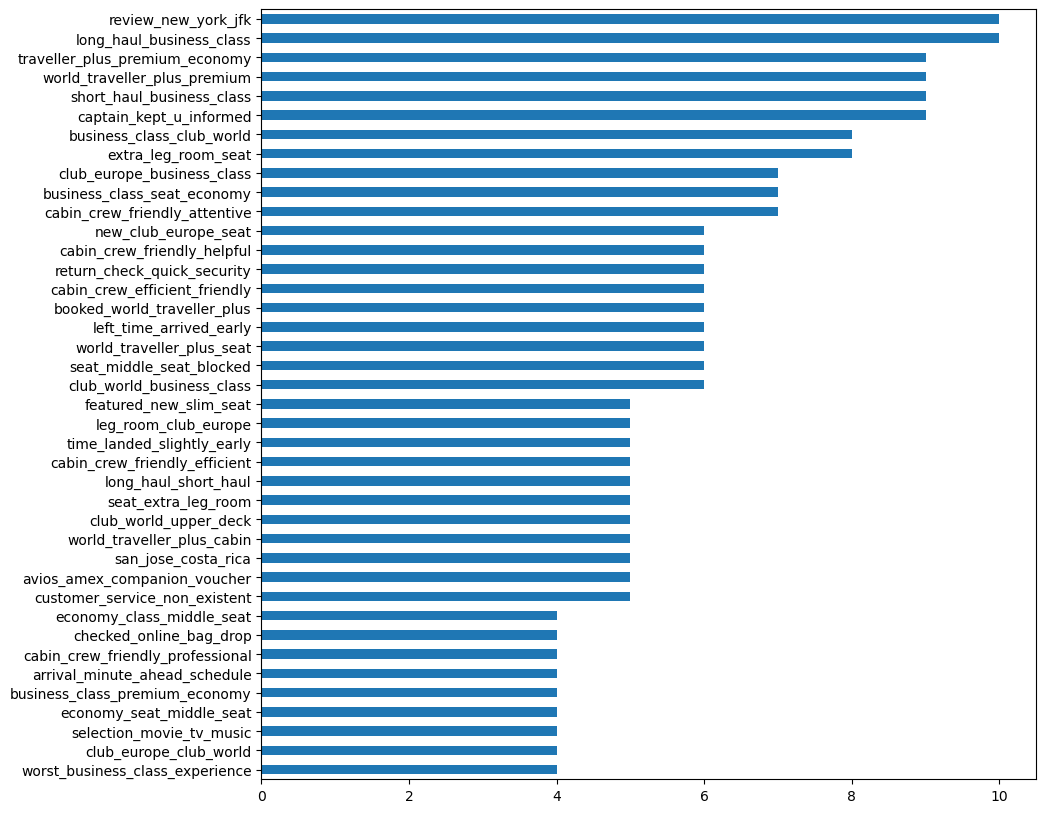

In [84]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

def get_freq_dist(new_words,num_of_ngrams):
    from nltk import ngrams

    ngrams = ngrams(new_words,num_of_ngrams)

    ngram_fd = FreqDist(ngrams).most_common(40)
    
    ngram_sorted = {k:v for k,v in sorted(ngram_fd,key=lambda item:item[1])}
    
    ngram_joined = {"_".join(k):v for k,v in sorted(ngram_fd,key=lambda item:item[1])}

   ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax

get_freq_dist(new_words,4)

As We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly_helpful, cabin_crew_friendly_attentive, cabin_crew_friendly_efficient, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways. 

VADER Method

In [91]:
%%capture
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vds = SentimentIntensityAnalyzer()

df['label']  =0

for i in range(len(df.corpus)):
    try:
        score = vds.polarity_scores(df.corpus[i])['compound']
    except KeyError:
            print('error')
    #print(score)
    if score > 0.2:
        df['label'][i] = 1
        #print("1st")
    elif score < 0:
        df['label'][i] = -1
        #print("2nd")
    else:
        df['label'][i] = 0

In [95]:
df.drop('polarity',axis=1,inplace=True)

<AxesSubplot:>

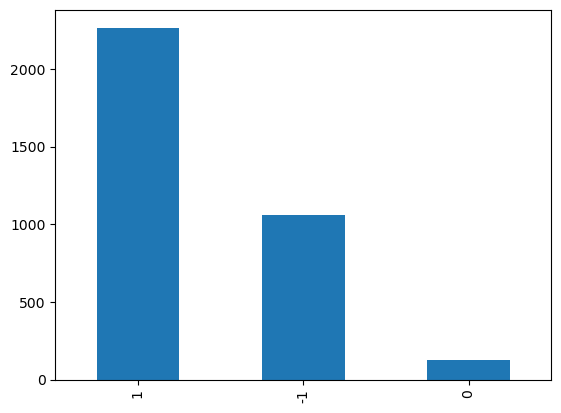

In [97]:
df.label.value_counts().plot(kind='bar')

BERT Model for Sentiment Analysis

In [99]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
from scipy.special import softmax

ModuleNotFoundError: No module named 'transformers'

In [ ]:
import urllib3, socket
from urllib3.connection import HTTPConnection
    
HTTPConnection.default_socket_options = ( 
            HTTPConnection.default_socket_options + [
            (socket.SOL_SOCKET, socket.SO_SNDBUF, 5000000), #1MB in byte
            (socket.SOL_SOCKET, socket.SO_RCVBUF, 5000000)
        ])

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)

In [98]:
example = df.corpus[50]
print(example)

happy say flight quite good except second rate euro business seating everything well done friendly informative cabin crew served good hot breakfast communicative folk nervous heathrow transit well done unfortunately bus gate used upon arrival


In [ ]:
encoded_text=tokenizer(example,return_tensors='tf')
output= model(**encoded_text)
scores = output[0][0].numpy()
scores = softmax(scores)
print(scores)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text=tokenizer(example,return_tensors='tf')
    output= model(**encoded_text)
    scores = output[0][0].numpy()
    scores = softmax(scores)
    scores_dict = {
    'roberta_neg': scores[0],
    'roberta_neu': scores[1],
    'roberta_pos': scores[2]
}
    return scores_dict

In [ ]:
#applying the model to the whole dataframe
#[:512] only nlp can only take 512 token at a time so it will 512 token from each review to predict
df['Sentiment']=df['corpus'].apply(lambda x: poalrity_scores_roberta(x[:512]))